In [0]:
import pickle
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPool2D

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
file = open("drive/My Drive/Colab Notebooks/trainX.pickle",'rb')
(x_train)= pickle.load(file)
file.close()
file = open("drive/My Drive/Colab Notebooks/trainY.pickle",'rb')
y_train= pickle.load(file)
file.close()

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten ,Activation
from keras import backend as k
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

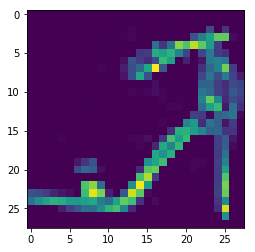

5


In [0]:
plt.imshow(x_train[8])
plt.show()
print(y_train[8])

In [0]:
img_rows, img_cols = 28, 28

In [0]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test=train_test_split(x_train,random_state=1)
y_train,y_test=train_test_split(y_train,random_state=1)

In [0]:
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)

In [0]:
if k.image_data_format()=='channel_first':
  x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
  x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
  input_shape=(1,img_rows,img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
  x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
  input_shape=(img_rows,img_cols,1)

In [0]:
batch_size = 128
num_classes = 10
epochs =35

In [0]:
#changing type to float


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (45000, 28, 28, 1)
45000 train samples
15000 test samples


In [0]:
# reshaping 


x_train = np.reshape(x_train, (45000, 28,28,1))
x_test = np.reshape(x_test, (15000, 28,28,1))

In [0]:
y_test.shape

(15000, 10)

In [0]:
#making of model

In [0]:
model = Sequential()



model.add(Conv2D(32, (3, 3), padding="same",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))





model.add(Conv2D(32, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Conv2D(16, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))





model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.25))




model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()




model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_21 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_22 (Activation)   (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 16)          4624      
__________

In [0]:
#fitting of model 
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 45000 samples, validate on 15000 samples
Epoch 1/35
45000/45000 [==============================] - 44s 981us/step - loss: 0.7716 - acc: 0.7168 - val_loss: 0.4784 - val_acc: 0.8254
Epoch 2/35
45000/45000 [==============================] - 43s 959us/step - loss: 0.4694 - acc: 0.8286 - val_loss: 0.4062 - val_acc: 0.8494
Epoch 3/35
45000/45000 [==============================] - 43s 959us/step - loss: 0.4032 - acc: 0.8540 - val_loss: 0.3555 - val_acc: 0.8715
Epoch 4/35
45000/45000 [==============================] - 43s 962us/step - loss: 0.3657 - acc: 0.8677 - val_loss: 0.3323 - val_acc: 0.8786
Epoch 5/35
45000/45000 [==============================] - 43s 966us/step - loss: 0.3376 - acc: 0.8781 - val_loss: 0.3104 - val_acc: 0.8853
Epoch 6/35
45000/45000 [==============================] - 43s 967us/step - loss: 0.3158 - acc: 0.8855 - val_loss: 0.3082 - val_acc: 0.8893
Epoch 7/35
45000/45000 [==============================] - 43s 965us/step - loss: 0.3056 - acc: 0.8895 - val_loss: 0.

In [0]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0. 1.]


In [0]:
#open of prediction file
file = open("drive/My Drive/Colab Notebooks/testX.pickle",'rb')
test= pickle.load(file)
file.close()

In [0]:
test.shape

(10000, 28, 28)

In [0]:
test = test.astype('float32')
test /= 255
test = np.reshape(test, (10000,28,28,1))

In [0]:
#Making of prediction

In [0]:
y_pred = model.predict_classes(test)

In [0]:
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [0]:
set(y_pred)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

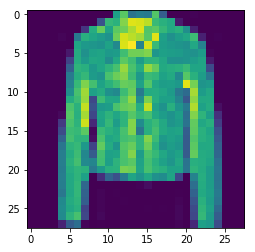

In [0]:
plt.imshow(test[10].reshape(28,28))
plt.show()

In [179]:
y_pred[0]

9

In [0]:
#putting predition in prediction pickle file

In [0]:

file = open("drive/My Drive/Colab Notebooks/predict.pickle",'wb')
pickle.dump(y_pred,file)
file.close()